<hr>
<b><font color='red'>Ejercicio 01</font></b>  

Entrena al modelo utilizando los 500, 200 y 20 primeros dígitos y pruebalo con los 200 siguientes, obten la matriz de confución para cada caso como se muestra a continuación:
<img src="digit.png" ALIGN="left">

hemos cargado 1797 arrays que corresponden a imagenes de dígitos con tamaño 8x8


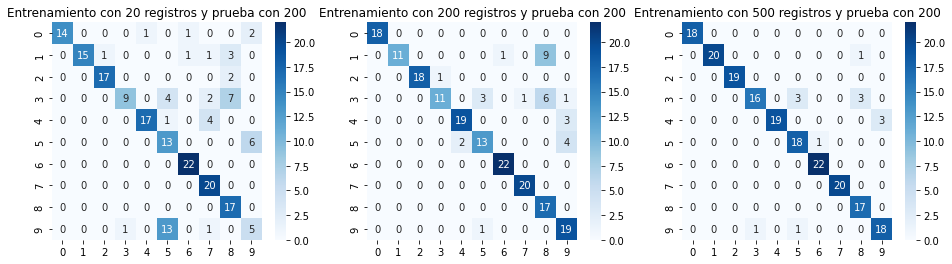

In [1]:
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets #son conjuntos de datos


svc = svm.SVC(gamma=0.001, C=100.) #creamos un estimado de tipo SVC
digits = datasets.load_digits()
print("hemos cargado "+str(len(digits.images))+" arrays que corresponden a imagenes de dígitos con tamaño 8x8")
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16, 4))
muestras=200
for ax,N in zip([ax1,ax2,ax3],[20,200,500]): 
    
    svc.fit(digits.data[1:N],digits.target[1:N])

    predicted=svc.predict(digits.data[len(digits.images)-muestras:len(digits.images)])

    ax.set_title("Entrenamiento con "+str(N)+" registros y prueba con 200")
    C=confusion_matrix(digits.target[len(digits.images)-muestras:len(digits.images)],predicted)
    sns.heatmap(C, annot = True, cmap = 'Blues',ax=ax)

plt.savefig("conf_imag.png", format="png",bbox_inches = 'tight') # specify filetype explicitly
plt.show()

<hr>
<b><font color='red'>Ejercicio 02</font></b>  

Entrena al modelo utilizando los 100, 1000 y 5000 primeras fotos,  pruebalo con 200 siguientes, obten la matriz de confusión para cada caso como se muestra a continuación:

<img src="conf_imag.png" ALIGN="alignleft size-full">

Ten en cuenta que este ejemplo ha sido hecho con 500,5000 y 50000 fotos

In [2]:
import numpy as np
import seaborn as sns
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.) #creamos un estimado de tipo SVC
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Cargamos "+str(X_train.shape)+" imagenes para entrenar")
print("Cargamos "+str(X_test.shape)+" imagenes para prueba")

Cargamos (50000, 32, 32, 3) imagenes para entrenar
Cargamos (10000, 32, 32, 3) imagenes para prueba


In [3]:


#X_train = np.reshape(X_train,(50000,3072))
#X_test = np.reshape(X_test,(10000,3072))
X_1D_train = []
for i in range(len(X_train)):
    X_1D_train.append(np.ravel(X_train[i]))
X_1D_train = np.array(X_1D_train)

X_1D_test = []
for i in range(len(X_test)):
    X_1D_test.append(np.ravel(X_test[i]))
X_1D_test = np.array(X_1D_test)


X_1D_train = X_1D_train.astype('float32')
X_1D_test = X_1D_test.astype('float32')
# Normalization of pixel values (to [0-1] range)

X_1D_train /= 255
X_1D_test /= 255


<AxesSubplot:>

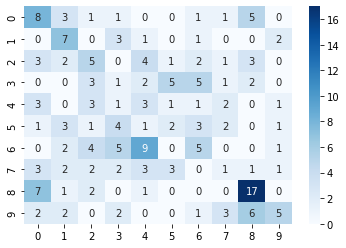

In [4]:

N_train=500
X_1D_train_small=X_1D_train[0:N_train]
y_train_small=np.ravel(y_train[0:N_train])
svc.fit(X_1D_train_small,y_train_small)
#usamos solo las N primeras imágenes
N_test=200
predicted=svc.predict(X_1D_test[0:N_test])
y_test=np.ravel(y_test[0:N_test])
C=confusion_matrix(y_test,predicted)
sns.heatmap(C, annot = True, cmap = 'Blues')


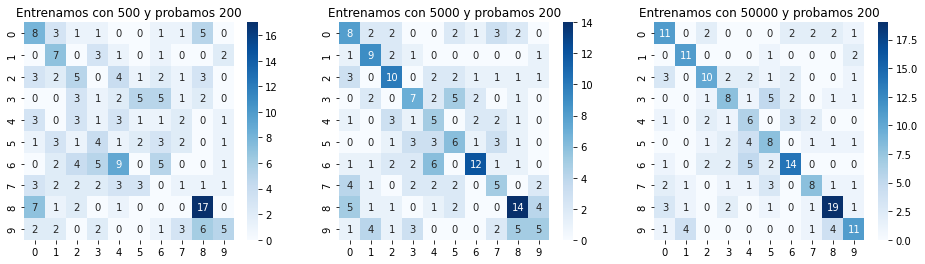

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16, 4))
muestras=200
for ax,N_train in zip([ax1,ax2,ax3],[500,5000,50000]): 
    X_1D_train_small=X_1D_train[0:N_train]
    y_train_small=np.ravel(y_train[0:N_train])
    svc.fit(X_1D_train_small,y_train_small)
    N_test=200
    predicted=svc.predict(X_1D_test[0:N_test])    
    C=confusion_matrix(y_test,predicted)
    ax.set_title("Entrenamos con "+str(N_train)+" y probamos "+str(N_test))
    sns.heatmap(C, annot = True, cmap = 'Blues',ax=ax)
plt.savefig("conf_imag.png", format="png",bbox_inches = 'tight') # specify filetype explicitly
plt.show()
#plt.close()
